In [1]:
from __future__ import absolute_import

import sys,os
import shapely.geometry as sg


workpath = os.getcwd()

from libs.pyFlatNormFixture import FlatNormFixture, get_fig_from_ax


area_name = {
    'mcbryde': r'Location\ A',
    'patrick_henry': r'Location\ B',
    'hethwood': r'Location\ C'}

FN = FLAT_NORM = "\\mathbb{{F}}_{{\\lambda}}"
FNN = NORMALIZED_FLAT_NORM = "\\widetilde{{\\mathbb{{F}}}}_{{\\lambda}}"
FNNM = FNM = FLAT_NORM_MEAN = "\\widehat{{\\mathbb{{F}}}}_{{\\lambda}}"
FNNC = FNC = FLAT_NORM_CITY = "\\widetilde{{\\mathbb{{F}}}}_{{\\lambda}}^{{\\  G}}"
CITY = lambda x: f"{{\\bf {area_name[x]}}}"




fx = FlatNormFixture('runTest')
fx.fig_dir = "figs/test"
fx.out_dir = "out/test"
fx.area = 'mcbryde'

# read geometries
act_geom, synt_geom, hull = fx.read_networks(fx.area)

# city region
MIN_X, MIN_Y, MAX_X, MAX_Y = 0, 1, 2, 3
city_bounds = hull.exterior.bounds
city_region = sg.box(*city_bounds)
city_width, city_height = city_bounds[MAX_X] - city_bounds[MIN_X], city_bounds[MAX_Y] - city_bounds[MIN_Y]
epsilon = max(city_width/2, city_height/2)


# entire location flat norm
D, T1, T2 = fx.get_triangulated_currents(city_region, act_geom, synt_geom)

/Users/meyu507/Library/CloudStorage/OneDrive-PNNL/Documents/projects/flatnorm/libs/pyExtractDatalib.py:23: UserWarning: Unpickling a shapely <2.0 geometry object. Please save the pickle again; shapely 2.1 will not have this compatibility.
  return pickle.load(path)


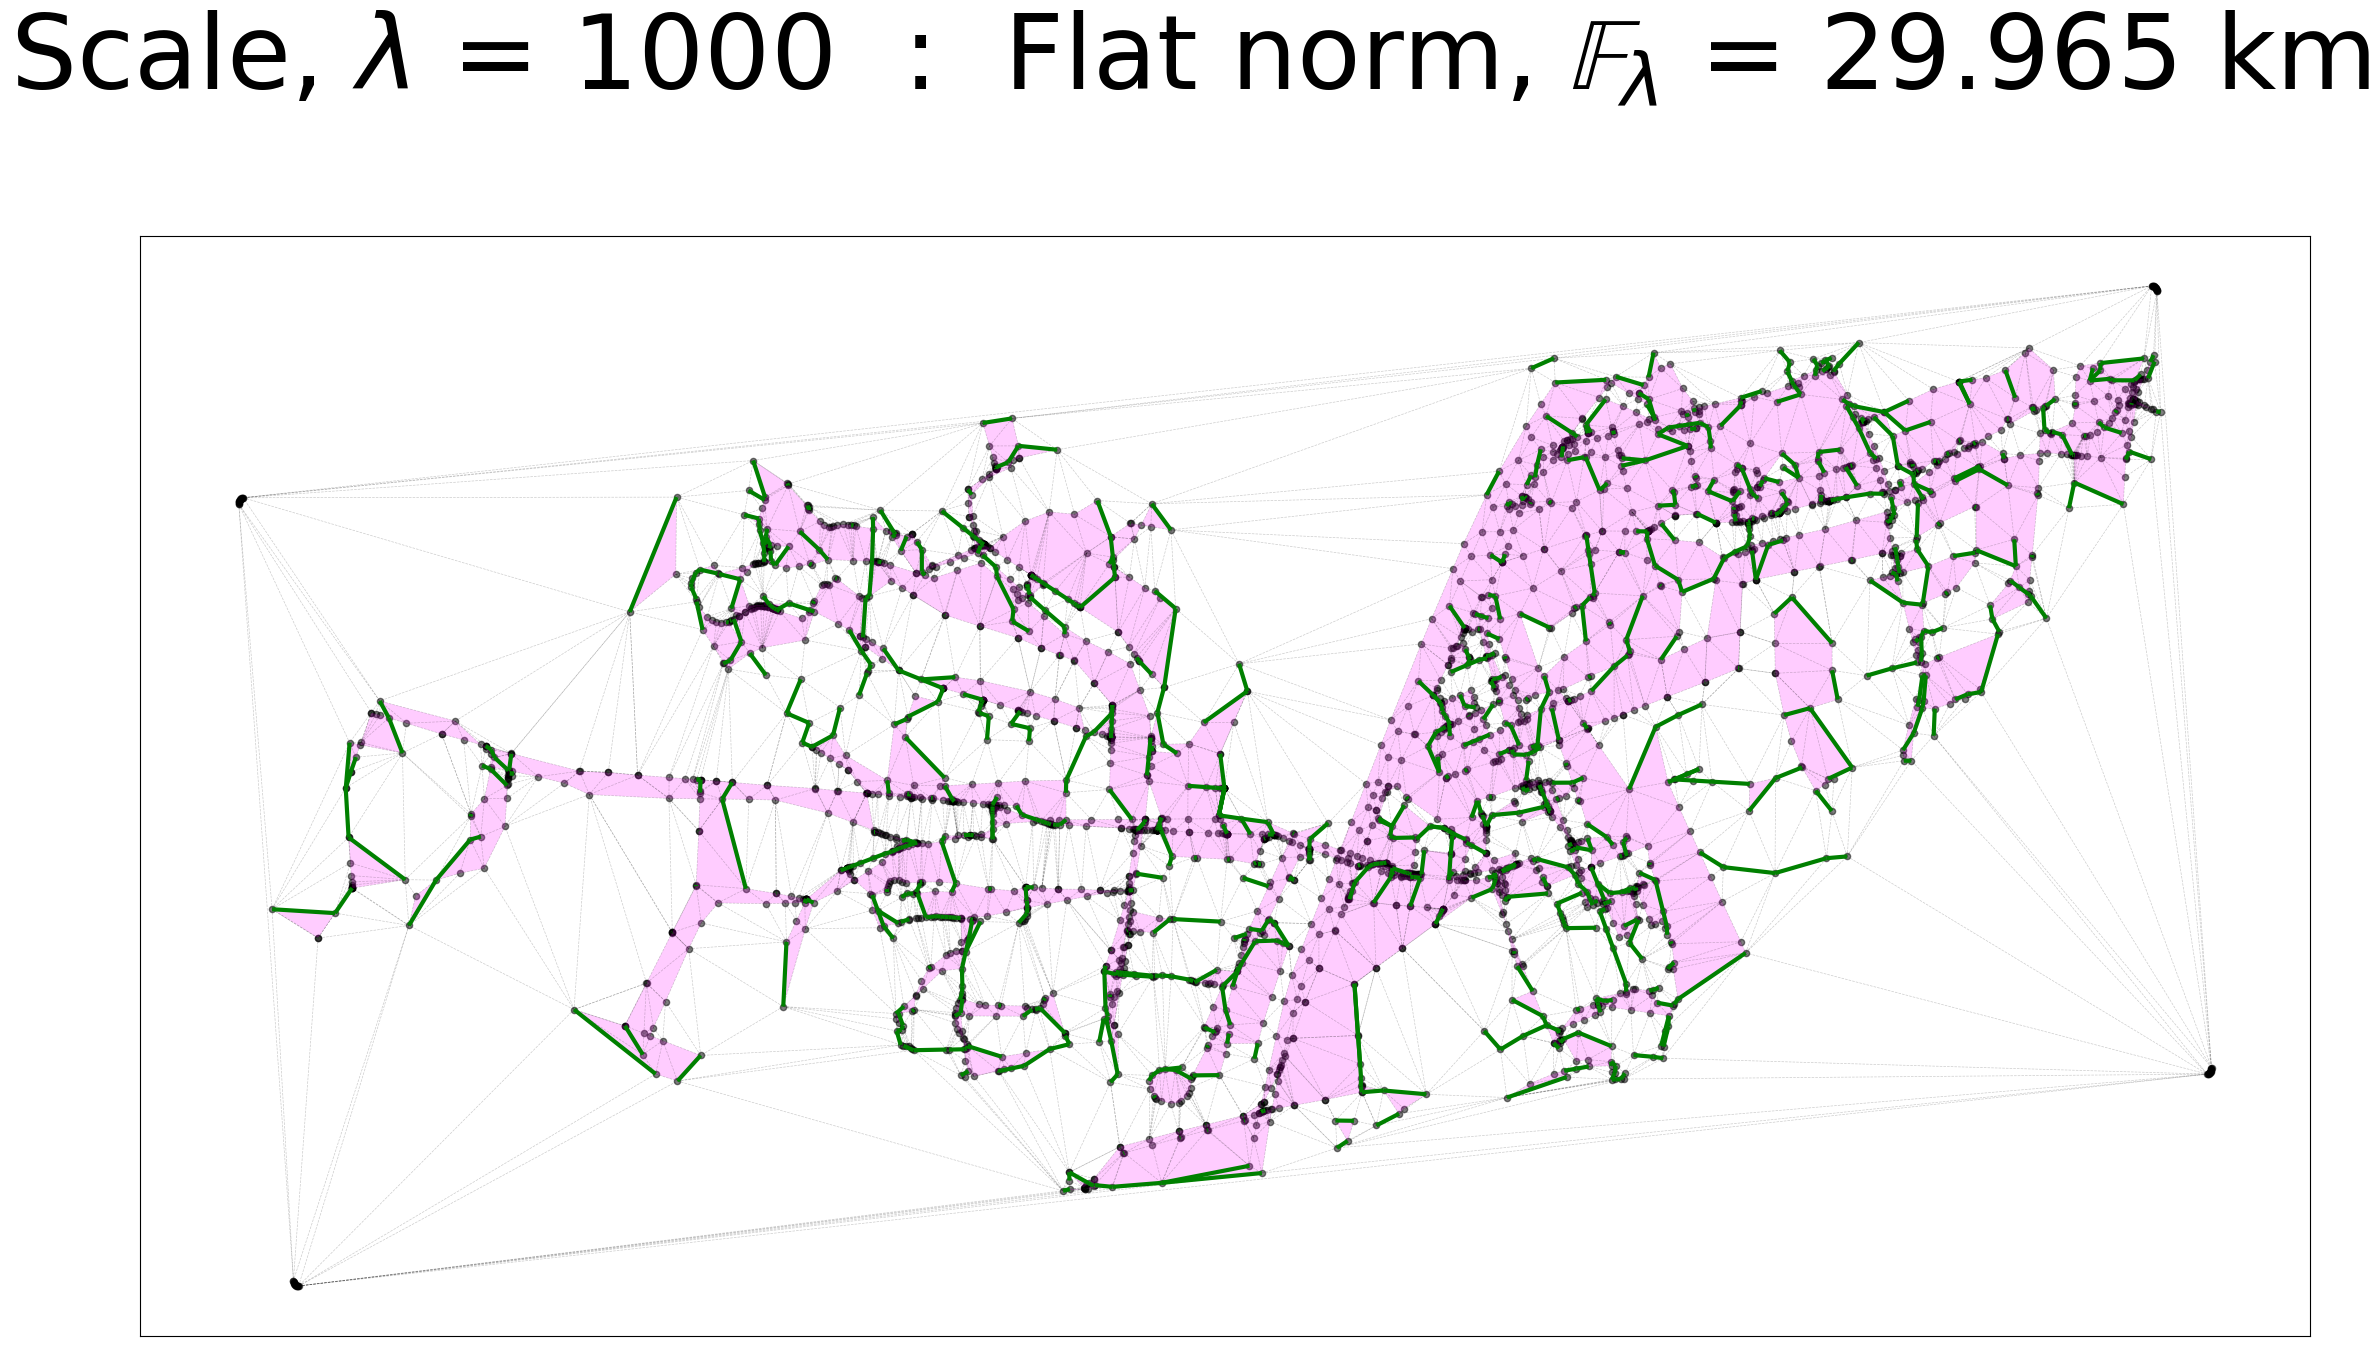

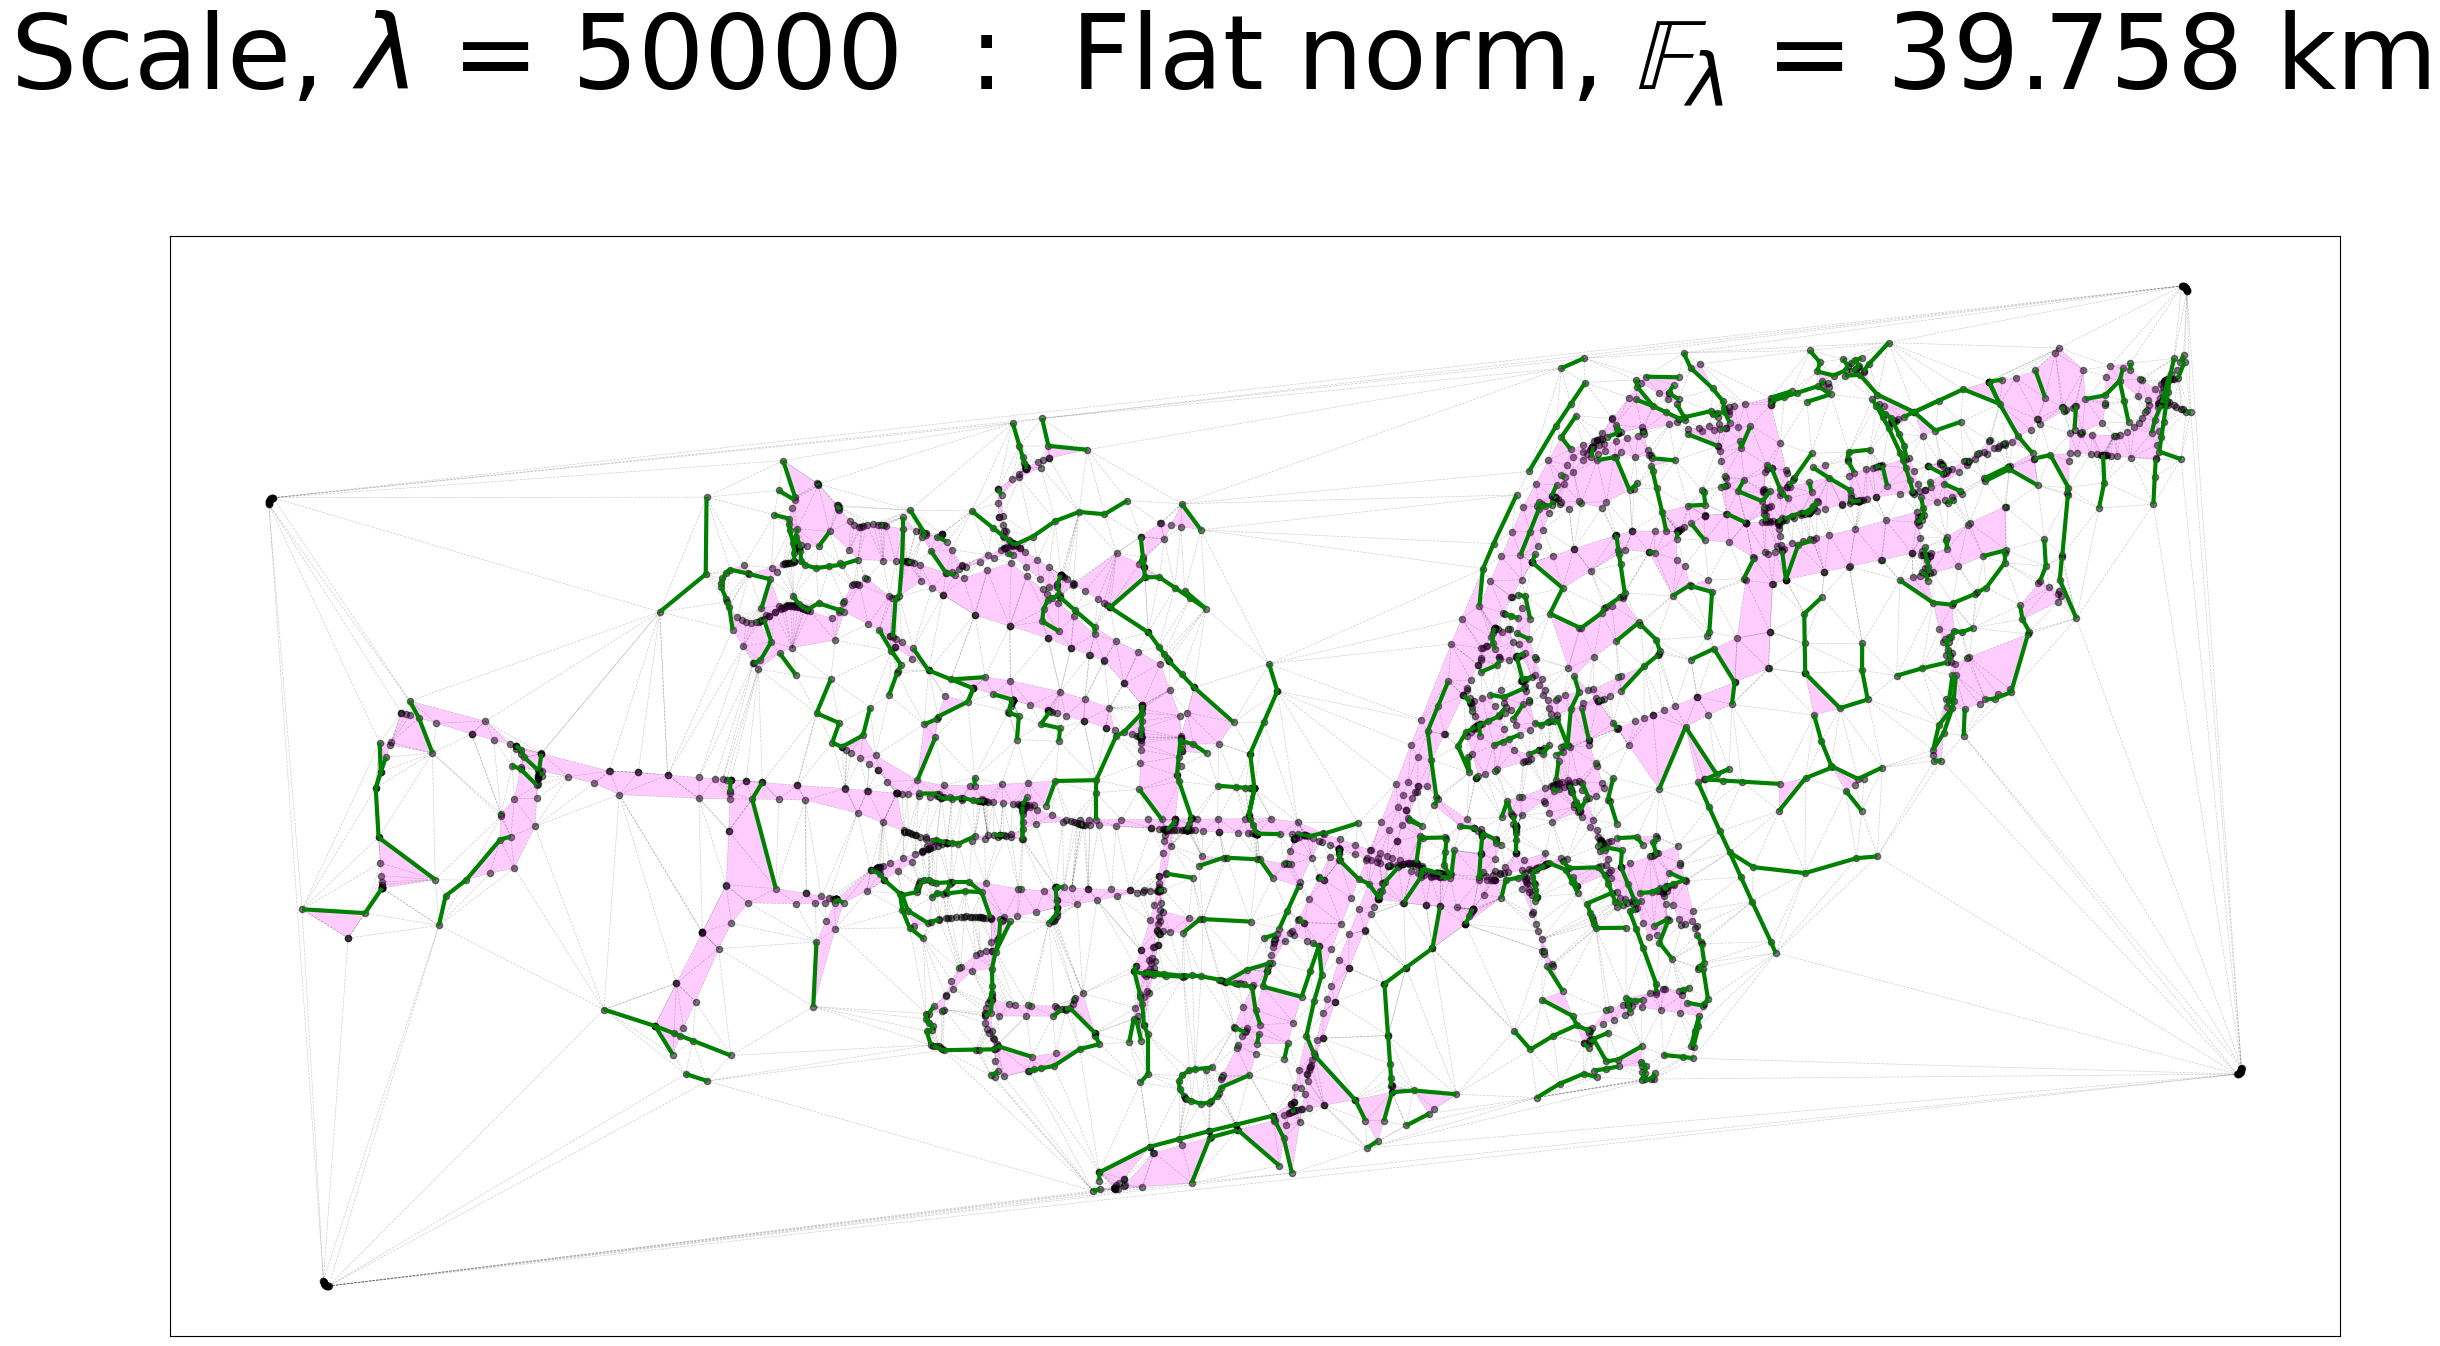

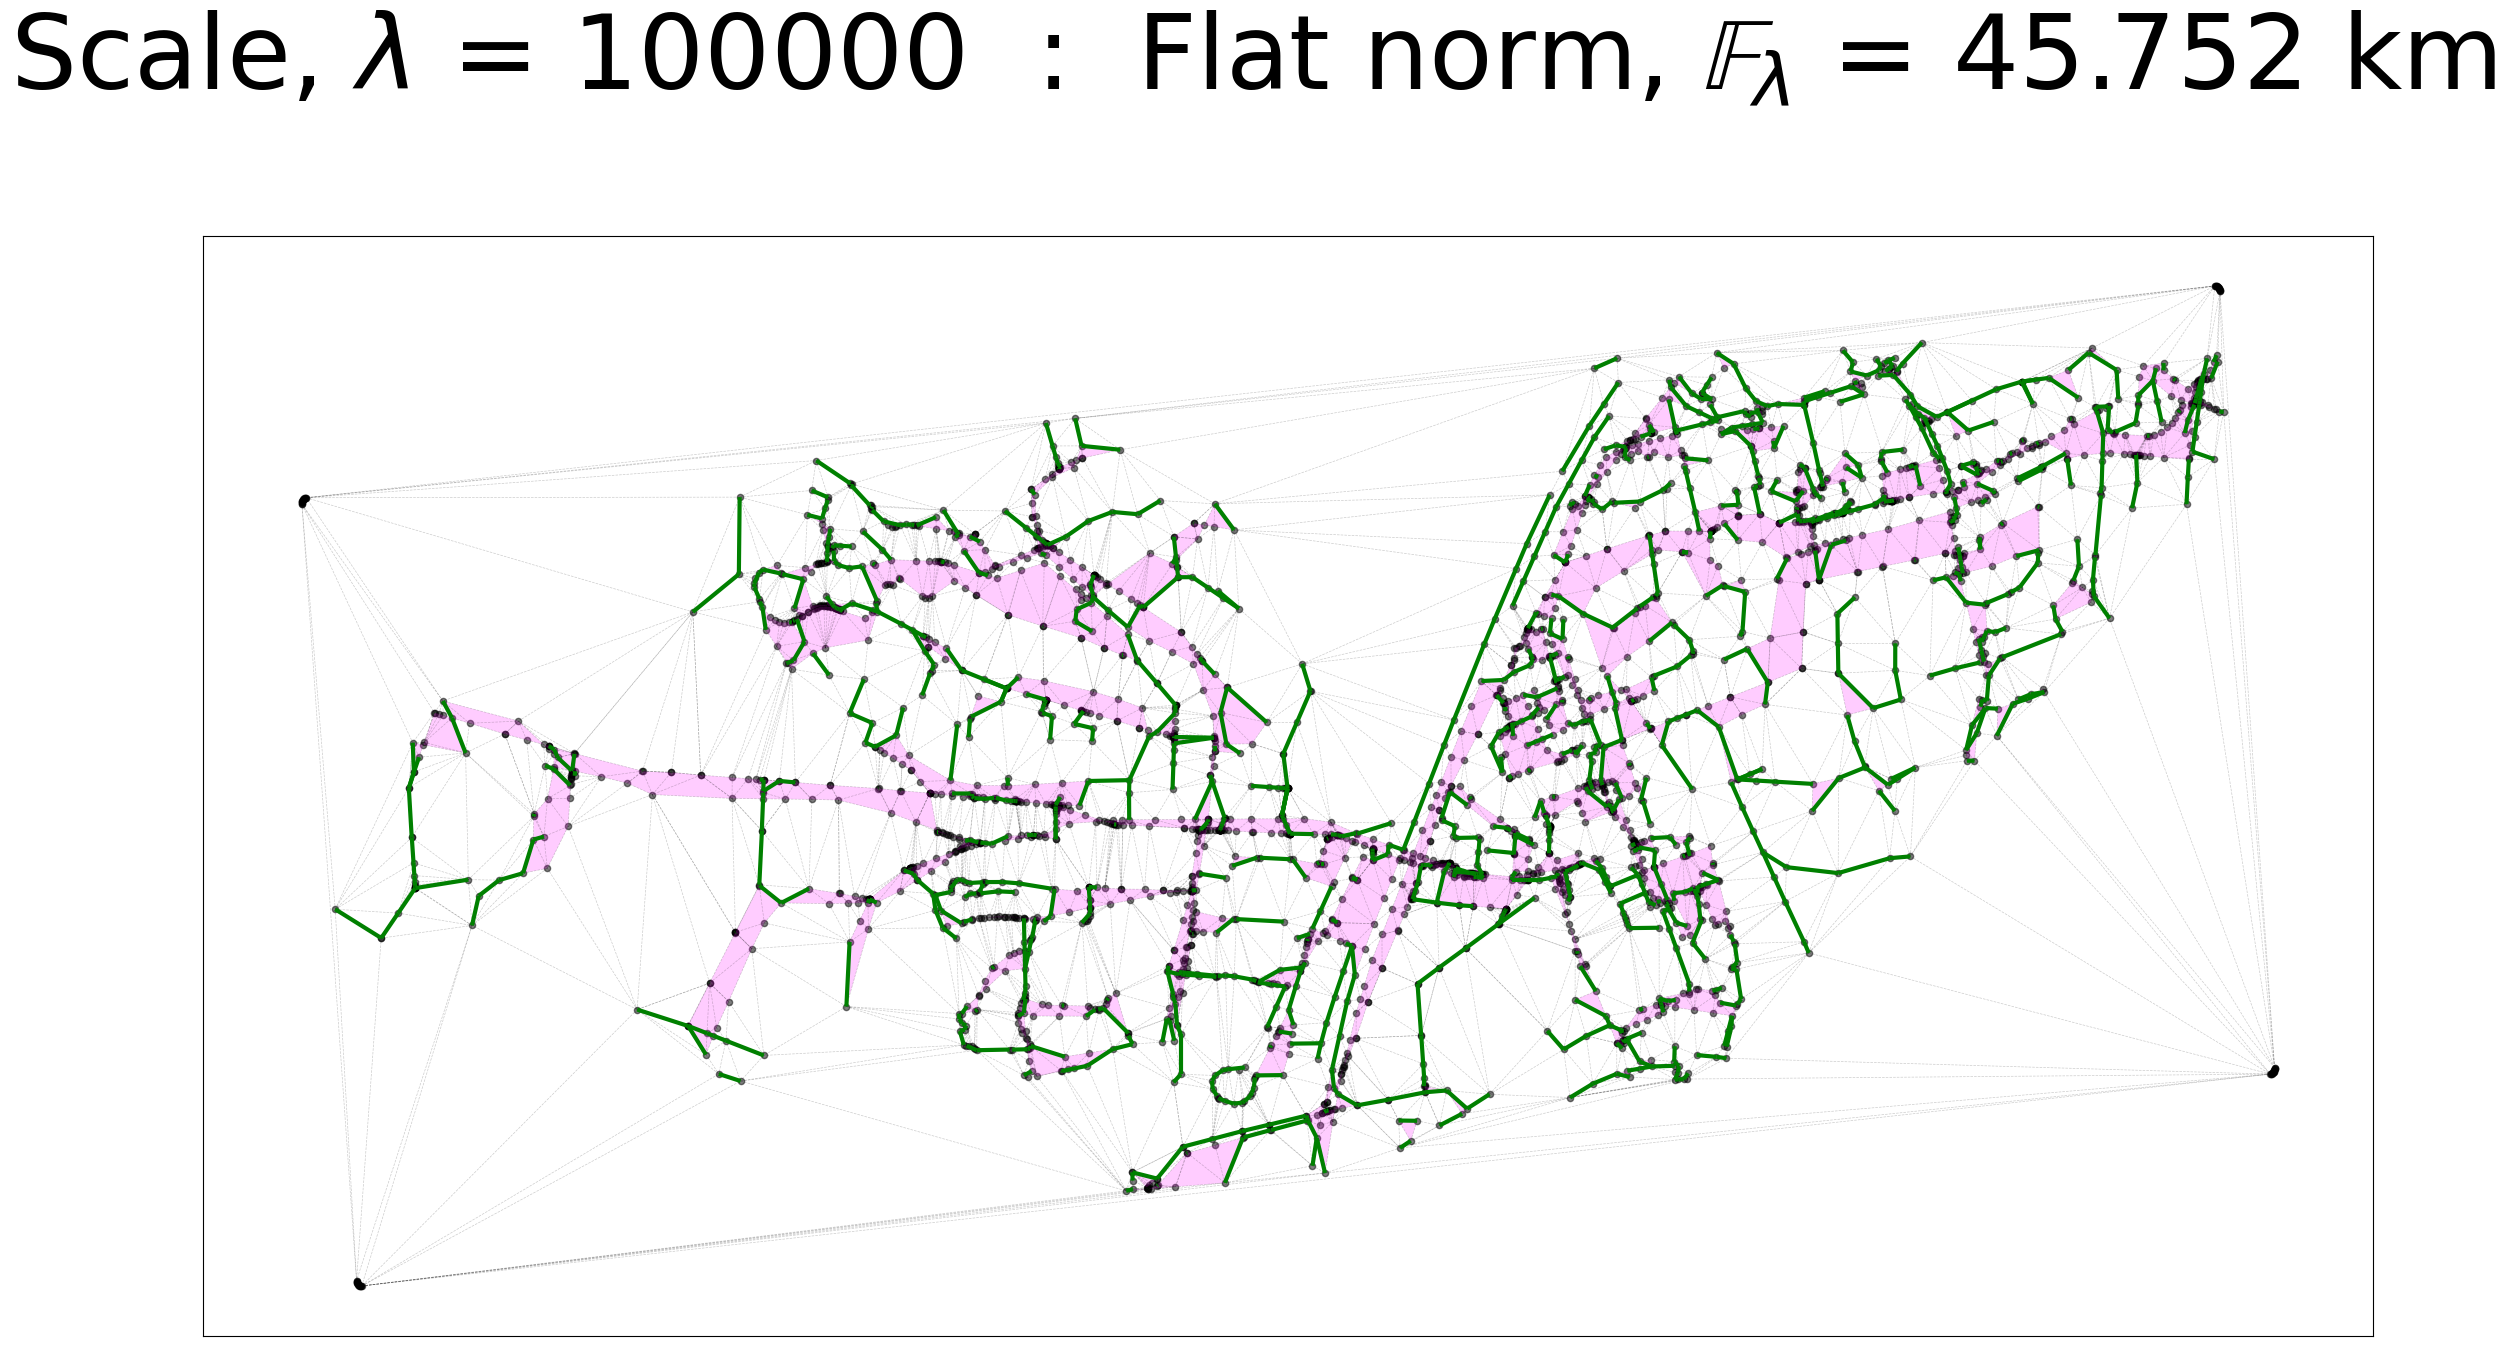

In [5]:
from libs.pyDrawNetworklib import plot_norm
from libs.pyFlatNormFixture import close_fig

for lambda_ in [1000, 50000, 100000]:

    norm, enorm, tnorm, w, plot_data = fx.compute_region_flatnorm(
        D = D, T1=T1, T2=T2,
        lambda_=lambda_,
        normalized=False,
        plot=True,
        verbose=False,
        opts="psVe"
    )


    # plot city flat norm
    R = 6378
    norm = norm * R

    fig, axs, no_ax = get_fig_from_ax(ax=None, ndim=(1, 1), figsize = (28, 16))

    triangulated = plot_data.get("triangulated")
    echain = plot_data.get("echain")
    tchain = plot_data.get("tchain")
    region = plot_data.get("region")
    plot_norm(triangulated, echain, tchain, axs, region_bound=region)

    to_file = f"{fx.area}-{lambda_}-flatnorm_city"
    to_file = f"{fx.fig_dir}/{to_file}.png"
    suptitle = f"Scale, $\\lambda$ = {lambda_}  :  Flat norm, ${FN}$ = {norm:0.3f} km"
    fig.suptitle(suptitle, fontsize=75)
    close_fig(fig, to_file, show=True, bbox_inches='tight')
    
